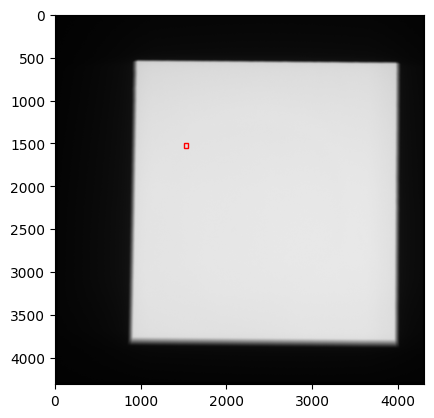

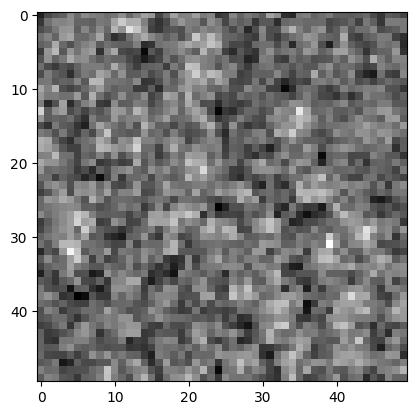

I;16B - тип изображения, (50, 50) - размер изображения,
среднее значение 12244 дисперсия 4355


In [1]:
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_elbow="C:\\Users\\lkond\\Desktop\\Python\\25_50kV_160mA_8mAs_50ms\\7.tiff"
imag = Image.open(path_elbow)
width=imag.width
height=imag.height
square=50 #Размер области
xleft_base=1500 #Стартовая координата для анализа (верхний левый угол прямоугольника)
yleft_base=1500
xright_base=xleft_base+square
yright_base=yleft_base+square
rect = patches.Rectangle(
    (xleft_base, yleft_base),           # левый верхний угол
    xright_base - xleft_base,            # ширина
    yright_base - yleft_base,            # высота
    linewidth=1,                # толщина линии
    edgecolor='red',            # цвет границы
    facecolor='none')            # без заливки
fig, ax = plt.subplots()
ax.add_patch(rect) #строим прямоугольник
plt.imshow(np.asarray(imag), cmap = 'gray')
plt.show()
coordinates_crop = (xleft_base, yleft_base, xright_base, yright_base) #Ось y направлена вниз, ось x вправо
imag_1 = imag.crop(coordinates_crop)
plt.imshow(np.asarray(imag_1), cmap = 'gray')
mean_s=int(np.mean(np.asarray(imag_1)))
var_s=int(np.var(np.asarray(imag_1)))
imag_corr=np.asarray(imag_1)
plt.show()
print(imag_1.mode, '- тип изображения,', imag_1.size, '- размер изображения,')
print('среднее значение', mean_s, 'дисперсия', var_s)

Средняя яркость пикселя 12234 Дисперсия пикселя 3070


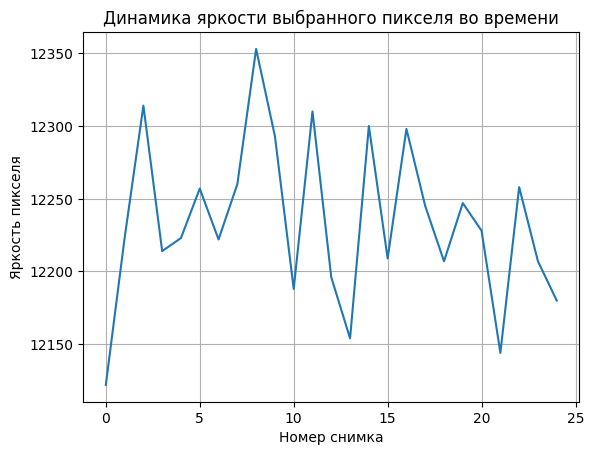

In [2]:
pixel_brightness=[]
j=int(imag_1.size[0]/4)
k=int(imag_1.size[0]/3) #Выбор пикселя
for i in range(25):
    path_elbow="C:\\Users\\lkond\\Desktop\\Python\\25_50kV_160mA_8mAs_50ms\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    oblast_loop=np.asarray(img)
    pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя, считываем его яркость
mean_pixel=int(np.mean(pixel_brightness))
var_pixel=int(np.var(pixel_brightness))
print('Средняя яркость пикселя', mean_pixel, 'Дисперсия пикселя', var_pixel)
plt.plot(pixel_brightness)
plt.grid()
plt.xlabel('Номер снимка')
plt.ylabel('Яркость пикселя')
plt.title('Динамика яркости выбранного пикселя во времени')
plt.show()

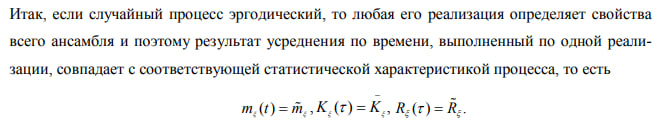

Посчитаем дисперсию для каждого пикселя

In [3]:
pixel_brightness=[]
pixel_brightness_total=[]
pixel_mean=[]
pixel_var=[]
oblast_var=[] #Список дисперсий всех областей
oblast_mean=[] #Список средних значений всех областей
for i in range(25):
    path_elbow="C:\\Users\\lkond\\Desktop\\Python\\25_50kV_160mA_8mAs_50ms\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    oblast_loop=np.asarray(img)
    oblast_mean.append(int(np.mean(oblast_loop)))
    oblast_var.append(int(np.var(oblast_loop)))
    pixel_brightness=[]
    for k in range(imag_1.size[0]):
        for j in range(imag_1.size[0]):
            pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя, считываем его яркость
    pixel_brightness_total.append(pixel_brightness)
pixel_brightness_total=list(map(list, zip(*pixel_brightness_total))) #Транспонирование списка списков
for f in range(len(pixel_brightness_total)): #Cчитаем список Среднего и Дисперсии каждого пикселя за 10 снимков
    pixel_mean.append(int(np.mean(pixel_brightness_total[f]))) #среднее значение пикселя
    pixel_var.append(np.var(pixel_brightness_total[f])) #дисперсия пикселя
std_var_pixel=np.std(pixel_var)
std_mean_pixel=np.std(pixel_mean)
mean_var_pixel=np.mean(pixel_var)
mean_mean_pixel=np.mean(pixel_mean)

Построим график дисперсии для всех пикселей

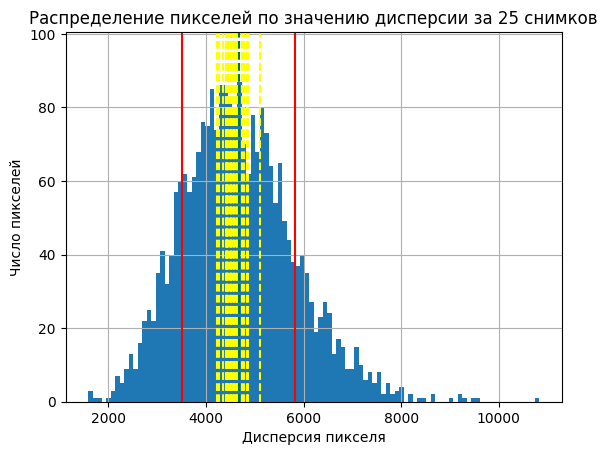

In [4]:
k_graph=[]
for k in range(len(pixel_var)): #Ось X
    k_graph.append(k+1)
y_hist, x_hist, _ = plt.hist(pixel_var, bins=100)
for i in range(len(oblast_var)): #все значения дисперсии площадей
    plt.axline((oblast_var[i], 1), (oblast_var[i], 1.1*int(y_hist.max())), linestyle='--', color = 'yellow') #Среднее площади снимка
plt.axline((mean_var_pixel, 1), (mean_var_pixel, 1.1*int(y_hist.max())), linestyle='--', color = 'green') #Средняя дисперсия распределения
plt.axline((mean_var_pixel+std_var_pixel, 1), (mean_var_pixel+std_var_pixel, 1.1*int(y_hist.max())), color='Red') #+ СКО распределения пикселей
plt.axline((mean_var_pixel-std_var_pixel, 1), (mean_var_pixel-std_var_pixel, 1.1*int(y_hist.max())), color='Red') #- СКО распределения пикселей
plt.xlabel('Дисперсия пикселя')
plt.ylabel('Число пикселей')
plt.title('Распределение пикселей по значению дисперсии за 25 снимков')
plt.grid()
plt.show()

Желтые линии отображают среднии дисперсии площадей

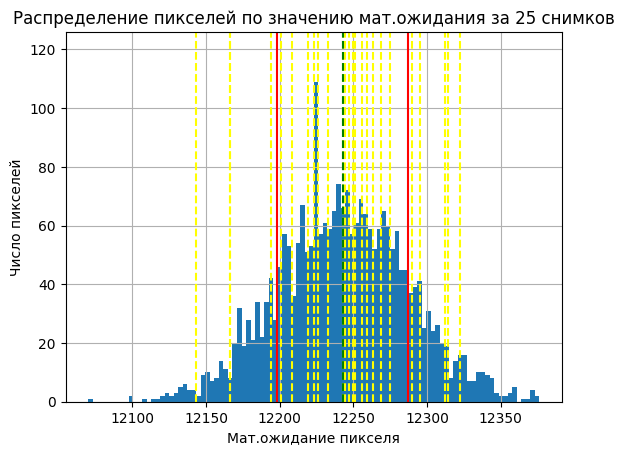

In [5]:
k_graph=[]
for k in range(len(pixel_mean)): #Ось X
    k_graph.append(k+1)
y_hist, x_hist, _ = plt.hist(pixel_mean, bins=100)
for i in range(len(oblast_mean)): #все значения среднего площадей
    plt.axline((oblast_mean[i], 1), (oblast_mean[i], 1.1*int(y_hist.max())), linestyle='--', color = 'yellow') #Среднее площади снимка
plt.axline((mean_mean_pixel, 1), (mean_mean_pixel, 1.1*int(y_hist.max())), linestyle='--', color = 'green') #Средняя дисперсия распределения
plt.axline((mean_mean_pixel+std_mean_pixel, 1), (mean_mean_pixel+std_mean_pixel, 1.1*int(y_hist.max())), color='Red') #+ СКО распределения пикселей
plt.axline((mean_mean_pixel-std_mean_pixel, 1), (mean_mean_pixel-std_mean_pixel, 1.1*int(y_hist.max())), color='Red') #- СКО распределения пикселей
plt.xlabel('Мат.ожидание пикселя')
plt.ylabel('Число пикселей')
plt.title('Распределение пикселей по значению мат.ожидания за 25 снимков')
plt.grid()
plt.show()

Желтые линии отображают средние значения площадей. Распределение имеет вид нормального. А значит процесс эргодичный

Проверим корреляцию для подтверждения незавимости сигналов. Будем перебирать пиксели снимка как будто это изменяется значение пикселя во времени. Посмотрим корреляцию двух "сигналов"

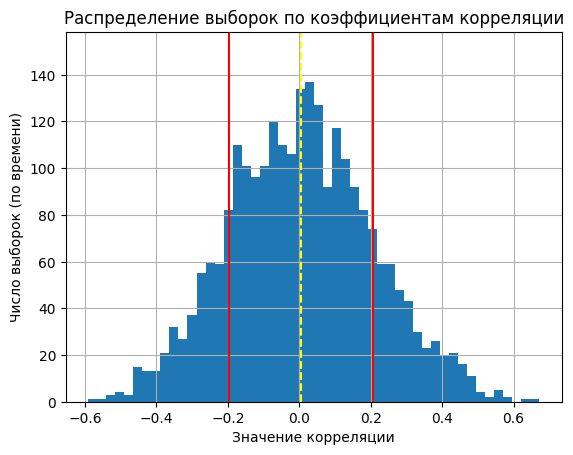

In [6]:
import secrets
corr_list=[]
for i in range(len(pixel_brightness_total)): #Итерируемся по списку яркостей всех пикселей
    random_selection=[]
    for j in range(len(pixel_brightness_total[0])):
        random_selection.append(int(secrets.choice(secrets.choice(imag_corr)))) #Вводим функцию для выбора случайного пикселя из площади
    corr_list.append(np.corrcoef(random_selection, pixel_brightness_total[i])[0][1]) #Записываем значение корреляции
y_hist_corr, x_hist_corr, _ = plt.hist(corr_list, bins=50)
std_corr=np.std(corr_list) #СКО распределения коэффициентов корреляции
mean_corr=np.mean(corr_list) #Среднее значение распределения коэффициентов корреляции
plt.axline((mean_corr, 1), (mean_corr, 1.1*int(y_hist_corr.max())), linestyle='--', color = 'yellow') #Среднее значение
plt.axline((mean_corr+std_corr, 1), (mean_corr+std_corr, 1.1*int(y_hist_corr.max())), color='Red') #+ СКО распределения
plt.axline((mean_corr-std_corr, 1), (mean_corr-std_corr, 1.1*int(y_hist_corr.max())), color='Red') #- СКО распределения
plt.xlabel('Значение корреляции')
plt.ylabel('Число выборок (по времени)')
plt.title('Распределение выборок по коэффициентам корреляции')
plt.grid()
plt.show()    
        

Вывод? Так как среднее гистограммы = 0, значит, что процессы не коррелированы. Что говорит о независимости значения пикселя во времени от случайной выборки пикселей по сечению процесса. А значит процессы независимы. 

Теперь посчитаем статистическую значимость. Генеральная дисперсия  НЕ известна. Поэтому используем исправленную выборочную дисперсию. В нашем случае: H0: E(oblast_mean)= mean_mean_pixel, H0: E(oblast_var)= mean_var_pixel. Начнём с распределения среднего.
https://mathprofi.ru/statisticheskie_gipotezy.html
Рассчитаем среднее значение oblast_mean и oblast_var

In [7]:
oblast_mean_mean=np.mean(oblast_mean)
oblast_mean_var=np.var(oblast_mean)
oblast_var_mean=np.mean(oblast_var)
oblast_var_var=np.var(oblast_var)
print(oblast_mean_mean, '- среднее среднее,', oblast_var_mean, '- средняя дисперсия')

12242.76 - среднее среднее, 4551.76 - средняя дисперсия


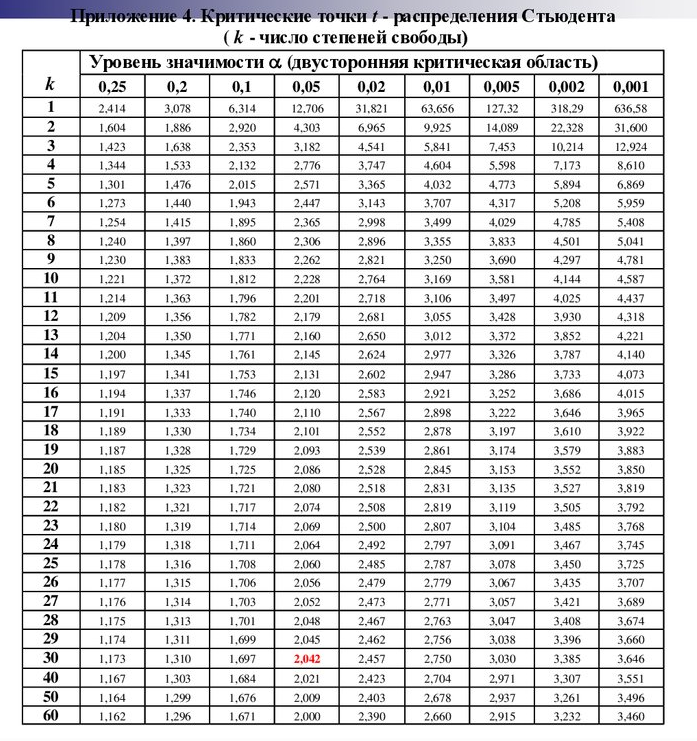

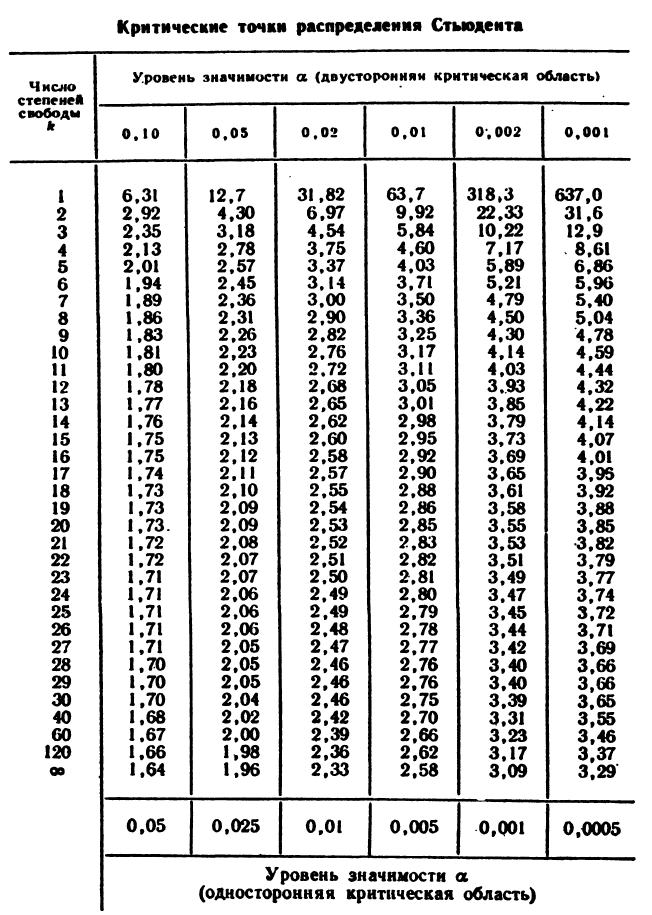

На основании n=25 измерений найдено, что среднее среднее
oblast_mean_mean и дисперсия oblast_mean_var. В предположении о нормальном распределении проверим на уровне значимости a=0.25
гипотезу  H0: E(oblast_mean)= mean_mean_pixel против конкурирующей гипотезы  H0: E(oblast_mean) =! mean_mean_pixel

Для уровня значимости a=0,25 и количества степеней свободы k=n-1=24; tкр=1,179
Вычислим tнабл для распределения среднего значения

In [8]:
import math
tкр=1.179
tнабл=((oblast_mean_mean-mean_mean_pixel)*math.sqrt(25))/math.sqrt(oblast_mean_var)
print('tнабл=', round(abs(tнабл),6), 'tкр=1,179')
if abs(tнабл)<abs(tкр):
    print('Условие выполняется для мат. ожидания, процесс эргодический')
else:
    print('Условие не выполняется для мат. ожидания')

tнабл= 0.005645 tкр=1,179
Условие выполняется для мат. ожидания, процесс эргодический


In [9]:
import math
tкр=1.179
tнабл=((oblast_var_mean-mean_var_pixel)*math.sqrt(25))/math.sqrt(oblast_var_var)
print('tнабл=', round(abs(tнабл),6), 'tкр=1,179')
if abs(tнабл)<abs(tкр):
    print('Условие выполняется для мат. ожидания, процесс эргодический')
else:
    print('Условие не выполняется для дисперсии')

tнабл= 3.097348 tкр=1,179
Условие не выполняется для дисперсии


Что пошло не так? А у нас дисперсия дисперсий площадей очень низка (график дисперсий) при стороне квадрата 50. Можно поварьировать размер выбранной области, чтобы увеличить разброс дисперсий. 
Поэтому пересчитаем по-другому.
Зафиксируем значения одной площади как гипотезу, а все пиксели сделаем как выборку.

На основании n=50*50 (размер квадрата) измерений найдено, что среднее значение площади
mean_mean_pixel и СКО std_mean_pixel. В предположении о нормальном распределении проверим на уровне значимости a=0.10
гипотезу  H0: mean_mean_pixel= oblast_mean_mean против конкурирующей гипотезы  H0: mean_mean_pixel =! oblast_mean_mean

In [10]:
import math
tкр=1.64
tнабл=((mean_mean_pixel-oblast_mean_mean)*math.sqrt(50*50))/std_mean_pixel
print('tнабл=', round(abs(tнабл),6), 'tкр=', tкр)
if abs(tнабл)<abs(tкр):
    print('Условие выполняется для мат. ожидания, процесс эргодический')
else:
    print('Условие не выполняется для мат. ожидания')

tнабл= 0.05809 tкр= 1.64
Условие выполняется для мат. ожидания, процесс эргодический


In [11]:
import math
tкр=1.64
tнабл=((mean_var_pixel-oblast_var_mean)*math.sqrt(50*50))/std_var_pixel
print('tнабл=', round(abs(tнабл),6), 'tкр=1,179')
if abs(tнабл)<abs(tкр):
    print('Условие выполняется для мат. ожидания, процесс эргодический')
else:
    print('Условие не выполняется для дисперсии')

tнабл= 5.112946 tкр=1,179
Условие не выполняется для дисперсии


Нужна другая проверка, так как нет конкретного истинного значения.
А есть 2 отдельных распределения!

Гипотеза о равенстве генеральных средних двух распределений.
выборки независимы, генеральные совокупности распределены нормально и известны их дисперсии

https://mathprofi.ru/proverka_statisticheskih_gipotez.html#gss

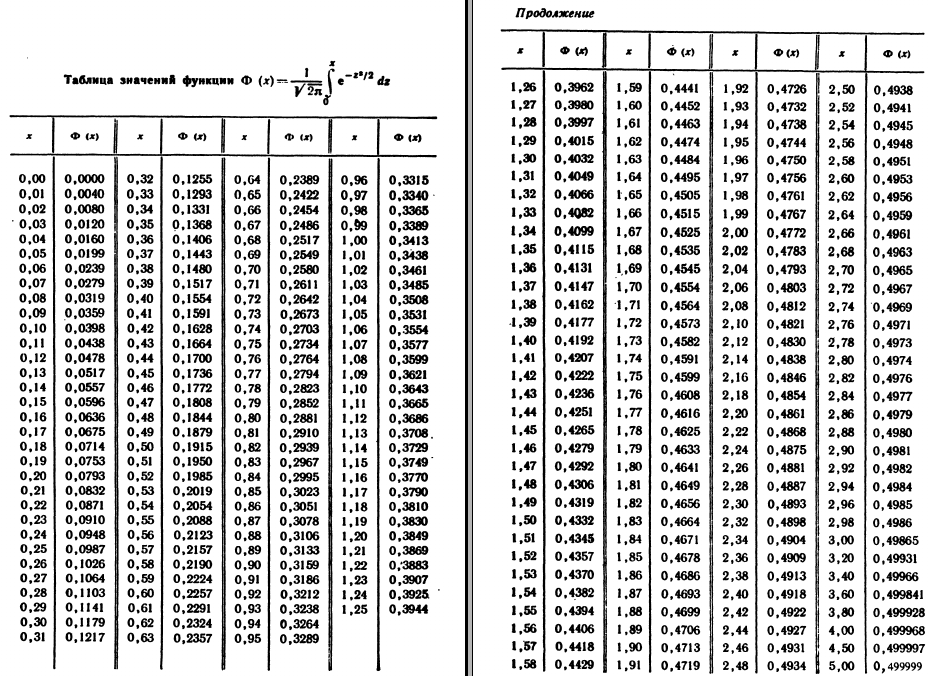

In [12]:
z=(mean_mean_pixel-oblast_mean_mean)/(math.sqrt((oblast_mean_var/25)+((std_mean_pixel**2)/square**2)))
a=0.05 #(5 % вероятность ошибки, если бы мы ОТВЕРГЛИ эту гипотезу)
Фкр=(1-a)/2
print(z, Фкр, 'Для распределения мат. ожидания')

0.005618491102007143 0.475 Для распределения мат. ожидания


In [13]:
zкр=1.96 #По таблице
if abs(z)<abs(zкр):
    print('Условие выполняется для мат. ожидания, процесс эргодический',z, '<', zкр)
else:
    print('Условие не выполняется для мат.ожидания', z, '>', zкр)

Условие выполняется для мат. ожидания, процесс эргодический 0.005618491102007143 < 1.96


In [14]:
z=(mean_var_pixel-oblast_var_mean)/(math.sqrt((oblast_var_var/25)+((std_var_pixel**2)/square**2)))
a=0.005 #Сколько "СКО" у исходного распределения?(0,5 % вероятность ошибки, если бы мы ОТВЕРГЛИ эту гипотезу)
Фкр=(1-a)/2
print(z, Фкр, 'Для распределения дисперсий')

2.6491685169035235 0.4975 Для распределения дисперсий


In [15]:
zкр=2.8 #По таблице
if abs(z)<abs(zкр):
    print('Условие выполняется для дисперсии, процесс эргодический', z, '<', zкр)
else:
    print('Условие не выполняется для дисперсии', z, '>', zкр)

Условие выполняется для дисперсии, процесс эргодический 2.6491685169035235 < 2.8


Теперь проверим Пуассоновость процесса. Дисперсия должна линейно зависеть от мат.ожидания

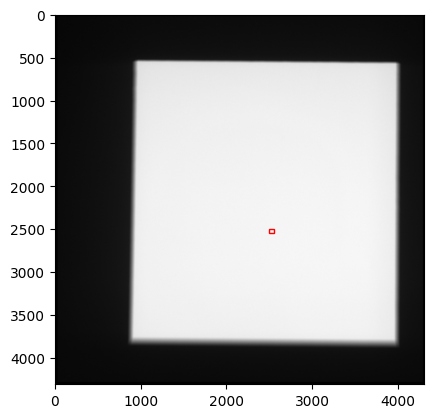

I;16B - тип изображения, (50, 50) - размер изображения,
среднее значение 3100 дисперсия 714


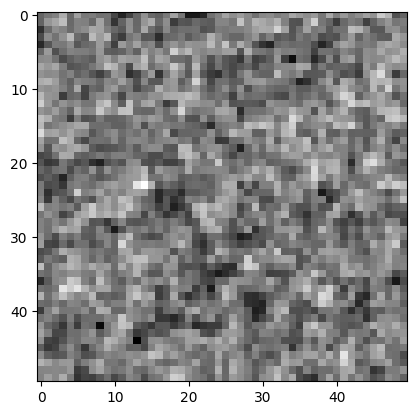

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_elbow="C:\\Users\\lkond\\Desktop\\Python\\9_lowing_intensity\\1.tiff"
imag = Image.open(path_elbow)
square_1=50 #Размер области
xleft_base_1=2500 #Стартовая координата для анализа (верхний левый угол прямоугольника)
yleft_base_1=2500
xright_base_1=xleft_base_1+square_1
yright_base_1=yleft_base_1+square_1
rect = patches.Rectangle(
    (xleft_base_1, yleft_base_1),           # левый верхний угол
    xright_base_1 - xleft_base_1,            # ширина
    yright_base_1 - yleft_base_1,            # высота
    linewidth=1,                # толщина линии
    edgecolor='red',            # цвет границы
    facecolor='none')            # без заливки
fig, ax = plt.subplots()
ax.add_patch(rect) #строим прямоугольник
plt.imshow(np.asarray(imag), cmap = 'gray')
plt.show()
coordinates_crop_1 = (xleft_base_1, yleft_base_1, xright_base_1, yright_base_1) #Ось y направлена вниз, ось x вправо
imag_1 = imag.crop(coordinates_crop_1)
mean_s1=int(np.mean(imag_1))
var_s1=int(np.var(imag_1))
plt.imshow(np.asarray(imag_1), cmap = 'gray')
print(imag_1.mode, '- тип изображения,', imag_1.size, '- размер изображения,')
print('среднее значение', mean_s1, 'дисперсия', var_s1)

 Var = k*Mean + b
 k = 0.3067 b = -222.4567


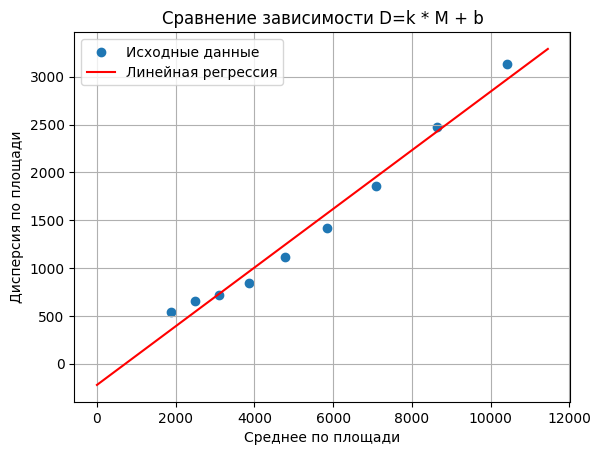

In [17]:
from scipy import stats
sredn_var=[]
sredn_mean=[]
for i in range(9):
    path_elbow="C:\\Users\\lkond\\Desktop\\Python\\9_lowing_intensity\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    imag_region_loop = img.crop(coordinates_crop_1) #Обрезка тёмных краёв
    oblast_loop=np.asarray(imag_region_loop)
    mean=np.mean(oblast_loop) #Мат. ожидание
    var=np.var(oblast_loop) #Дисперсия
    #print(round(mean,2), '- средн.;', round(var,2),'- Дисперсия;')
    sredn_var.append(round(var,2))
    sredn_mean.append(round(mean,2))
sredn_mean.sort()
sredn_var.sort()
plt.scatter(sredn_mean, sredn_var, label='Исходные данные')
plt.grid()
plt.xlabel('Среднее по площади')
plt.ylabel('Дисперсия по площади')
plt.title('Сравнение зависимости D=k * M + b')
mean_line = stats.linregress(sredn_mean, sredn_var)
x=np.linspace(0, 1.1*max(sredn_mean), 20)
b=round(mean_line.intercept,4)
k=round(mean_line.slope,4)
print(' Var = k*Mean + b\n','k =', k, 'b =', b)
plt.plot(x, b + k*x, 'r', label='Линейная регрессия')
plt.legend()
plt.show()

Найдём СКО по среднему и по дисперсии

СКО расстояния от точек до прямой (перпендикуляр)= 50.16660499504838 Среднее расстояние = 106.57087541222965


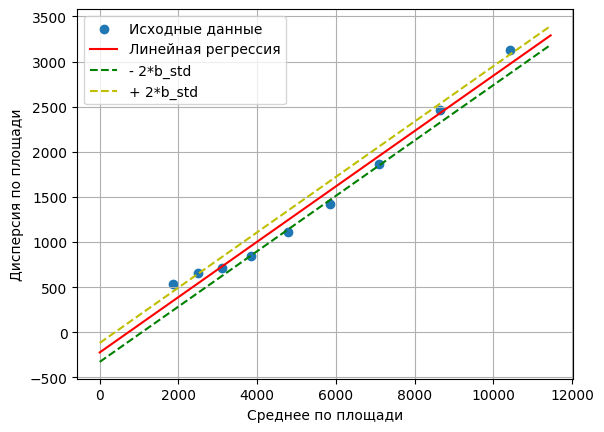

b_std= 52.473043181835166


In [18]:
N=9 #Число снимков
mean_dist=[]
var_dist=[]
std_1=[]
for i in range(N):
    mean_dist.append(sredn_mean[i]-((sredn_var[i]-b)/k))
    var_dist.append(sredn_var[i]-(sredn_mean[i]*k+b))
    if var_dist[i]<0:
        std_1.append(abs(k*sredn_mean[i]-sredn_var[i]+b)/math.sqrt(k**2+1)) #Расстояние от точки до прямой
    else:
        std_1.append(abs(k*sredn_mean[i]-sredn_var[i]+b)/math.sqrt(k**2+1))
std=np.std(std_1)
mean=np.mean(np.abs(std_1))
b_std=std/math.cos(math.atan(k)) 
print('СКО расстояния от точек до прямой (перпендикуляр)=', std, 'Среднее расстояние =', mean)
plt.scatter(sredn_mean, sredn_var, label='Исходные данные')
plt.grid()
plt.xlabel('Среднее по площади')
plt.ylabel('Дисперсия по площади')
plt.plot(x, b + k*x, 'r', label='Линейная регрессия')
plt.plot(x, b + k*x - 2*b_std, 'g', label='- 2*b_std', linestyle='--') #- 2*b_std
plt.plot(x, b + k*x + 2*b_std, 'y', label='+ 2*b_std', linestyle='--') #+ 2*b_std
plt.legend()
plt.show()
print('b_std=', b_std)
    